In [123]:
# Scraping de meneame.net - Versió exportar en Excel per evitar problemes de encode amb W10
import requests
from bs4 import BeautifulSoup

In [124]:
import pandas as pd
import xlsxwriter
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [125]:
# Els fitxers d'surtida inclouen en el nom el temps del scraping
from datetime import datetime
n = datetime.now()
ara = n.strftime("%d%m%y_%H%M")
excel='meneameScraping'+ara+'.xlsx'
comasep='meneameScraping'+ara+'.csv'

In [126]:
# Presentació a meneame.net 'Hola, sóc un Firefox en Ubuntu Linux'- Necessari a fi que meneame ens contesti
USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:87.0) Gecko/20100101 Firefox/87.0"
# = "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:86.0) Gecko/20100101 Firefox/86.0"
headers = {"user-agent": USER_AGENT}

In [127]:
# Salvem les dades obtingudes en format Excel i csv - capsalera
capsalera=['Titular','URL','Usuari','Entrada','Meneos','Clics','Comentaris','Vots Positius','Vots Anònims','Vots Negatius','Categoria','Karma','Data Submissió']
meneaBook=xlsxwriter.Workbook(excel)
meneaFull=meneaBook.add_worksheet()
for i in range(13):
    meneaFull.write(0,i,capsalera[i])

In [128]:
# Scraping de l'agregador Meneame
# URL='https://www.meneame.net que estenem a 10 pàgines més'
# Notícia destacada: no la incloem perquè no sempre hi ha 
    ##  print(soup.findAll("div", {"id": "header-top-bar"}))
titular = []
web = []
usuari = []
entrada = []
meneos = []
clics = []
comentaris = []
v_positius = []
v_anonims = []
v_negatius = []
sub = []
karma = []
created = []

for counter in range(1,11):
    URL = "https://www.meneame.net/?page="+str(counter)
    # Petició: què hi ha avui?
    page=requests.get(URL, headers=headers)
    meneame = page.content
    soup = BeautifulSoup(meneame,"html.parser")
    # Scraping de: Titular - Web - Usuari
    for i in soup.find_all('div',{'class':'center-content'}):
        noticia = i.find('a')
        t = noticia.string
        w = noticia['href']
        u_usuari = noticia.find_next('a')['href']
        u = u_usuari.split('/')[2]
        titular.append(t)
        web.append(w)
        usuari.append(u)
    # Scraping de: Entrada
    for i in soup.find_all('div',{'class':'news-content'}):
        e = (i.string)
        entrada.append(e)
    # Scraping de: Meneos
    for i in soup.find_all('div',{'class':'votes'}):
        noticia_m = i.find('a')
        # aixó és perque hi han algunes class:votes que no tenen info
        if noticia_m != None:
            m = noticia_m.string
            meneos.append(m)
    # Scraping de: Clics   
    for i in soup.find_all('div',{'class':'clics'}):
        c = i.find('span').string
        if c != None:
            clics.append(c)
    # Scraping de: Comentaris
    for i in soup.find_all('div',{'class':'news-details-main'}):
        com = i.find('a')['data-comments-number']
        comentaris.append(com)
    # Scraping de: Vots positius - Vots anónims - Vots negatius - Sub - Karma
    for i in soup.find_all('div',{'class':'news-details-data-up'}):
        x = i.find_all('span') #x es un bs4.element.ResultSet
        v_positius.append(x[2].string)
        v_anonims.append(x[5].string)
        v_negatius.append(x[8].string)
        karma.append(x[12].string)
        sub.append(x[13].a.string)
    # Scraping de: Data de creació
    for i in soup.find_all('div',{'class':'news-submitted'}):
        x = str(i.find_all('span',{'class':'ts visible'})[0])
        z = int(x.split('=')[2].split(' ')[0].replace('"',''))
        DMA=datetime.fromtimestamp(z)
        created.append(DMA.strftime("%d-%m-%y %H:%M"))       
    # Salvem dades de cada notícia
    for i in range(len(titular)):
        meneaFull.write(i+1,0,titular[i])
        meneaFull.write(i+1,1,web[i])
        meneaFull.write(i+1,2,usuari[i])
        meneaFull.write(i+1,3,entrada[i])
        meneaFull.write(i+1,4,meneos[i])
        meneaFull.write(i+1,5,clics[i])
        meneaFull.write(i+1,6,comentaris[i])
        meneaFull.write(i+1,7,v_positius[i])
        meneaFull.write(i+1,8,v_anonims[i])
        meneaFull.write(i+1,9,v_negatius[i])
        meneaFull.write(i+1,10,sub[i])
        meneaFull.write(i+1,11,karma[i])
        meneaFull.write(i+1,12,created[i])
        


meneaBook.close()


In [129]:
# Convertim el fitxer Excel en datagrama per a obtenir gràfiques

# Cal esperar que es creï el fitxer: pot tardar una mica!

menDF= pd.read_excel(excel)
# Comprovem el datagrama
menDF.head()

,Titular,URL,Usuari,Entrada,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Categoria,Karma,Data Submissió
0,Comunicado Sociedad Española de Trombosis y H...,https://www.seth.es/index.php/noticias/noticia...,Inutil,Desde la Sociedad Española de Trombosis y Hemo...,38,363,8,30,8,5,actualidad,449,11-04-21 23:59
1,El explorador muere en el hielo,https://www.revistamercurio.es/2021/04/11/el-e...,Tieso,15 de enero en la Antártida. Pleno verano con ...,24,575,1,20,4,0,cultura,440,11-04-21 12:38
2,Cuando el banco se convierte en juez y 'conde...,https://www.elconfidencial.com/amp/espana/2021...,Octaviano,"Una llamada, una carta y, de la noche a la mañ...",57,249,12,35,22,0,actualidad,434,11-04-21 21:40
3,La Comunidad de Madrid suspende la actividad ...,https://www.europapress.es/madrid/noticia-comu...,unmundofeliz,El Gobierno regional ha explicado en un comuni...,172,278,13,103,69,0,Rescates,428,11-04-21 20:26
4,13 películas imprescindibles de ciencia-ficci...,https://www.xataka.com/cine-y-tv/13-peliculas-...,ChanVader,Hay un tópico asociado férreamente al género d...,77,3155,41,54,23,11,actualidad,527,11-04-21 22:22


In [130]:
menDF.tail()

,Titular,URL,Usuari,Entrada,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Categoria,Karma,Data Submissió
245,La historia de la imagen que plasma la que pr...,https://www.xataka.com/otros/historia-imagen-q...,NubisMusic,Que las hazañas y momentos históricos de los ú...,247,5695,65,114,133,4,cultura,440,06-04-21 14:01
246,Rompe la nariz a una mujer que le pidió que s...,https://www.lavozdeasturias.es/noticia/gijon/2...,Verdaderofalso,"El hombre, de 62 años y que contaba con antece...",471,1880,70,190,281,1,actualidad,428,06-04-21 19:05
247,"Política, fe y vacunación: el rechazo de los ...",https://www.nytimes.com/es/2021/04/05/espanol/...,Tiopio,Millones de adultos blancos evangélicos en Est...,289,1261,57,128,161,2,actualidad,403,06-04-21 07:57
248,Cómo eran las relaciones sexuales de los nean...,https://www.bbc.com/mundo/vert-fut-56635630,SrYonkus,Era un neandertal y estaba casi al desnudo. Te...,153,8477,80,89,64,3,cultura,407,06-04-21 15:05
249,La Fiscalía desinfla la causa a Podemos y rec...,https://www.lainformacion.com/espana/fiscalia-...,Bauman83,El Ministerio Público presenta una batería de ...,560,967,91,246,314,3,politica,420,06-04-21 10:35


In [131]:
# Salvem les dades com csv
menDF.to_csv(comasep)

In [132]:
# Definim columnes del datagrama per a gràfiques tipus scatter
meneos=menDF['Meneos']
clics=menDF['Clics']
comen=menDF['Comentaris']
vmas=menDF['Vots Positius']
vmen=menDF['Vots Negatius']
vanon=menDF['Vots Anònims']
karma=menDF['Karma']

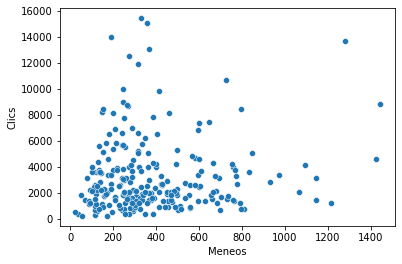

In [133]:
# Analitzem les correlacions entre variables numèriques:
# A soles hi ha correlació entre 'Meneos' i 'Vots Positius' o 'Vots Anònims'
sns.scatterplot(x=meneos,y=clics)
plt.show()

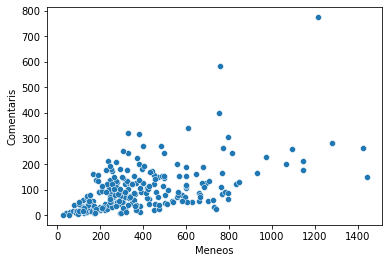

In [134]:
sns.scatterplot(x=meneos,y=comen)
plt.show()

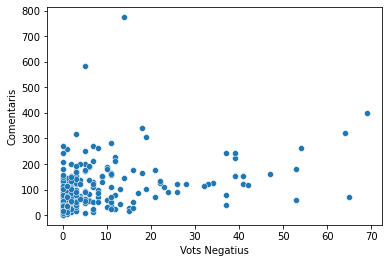

In [135]:
# Els vots negatius no es molesten en fer comentaris: no estan correlacionats
sns.scatterplot(x=vmen,y=comen)
plt.show()

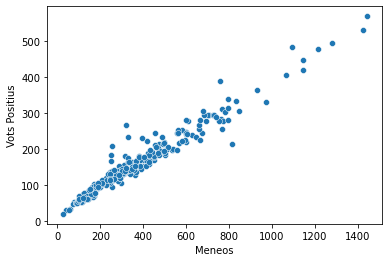

In [136]:
# Els vots anònims i els vots positius estan correlacionats:
# un de cada tres meneos vota positiu
sns.scatterplot(x=meneos,y=vmas)
plt.show()

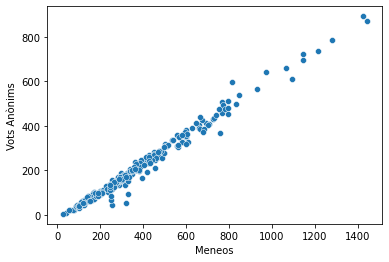

In [137]:
# Els vots anònims i els 'meneos' estan correlacionats:
sns.scatterplot(x=meneos,y=vanon)
plt.show()

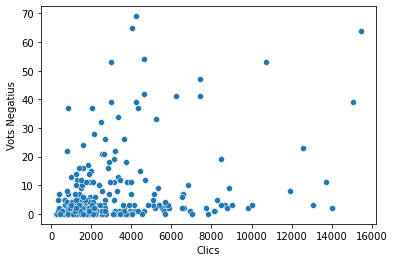

In [138]:
# Pocs clics voten negativament
sns.scatterplot(x=clics,y=vmen)
plt.show()

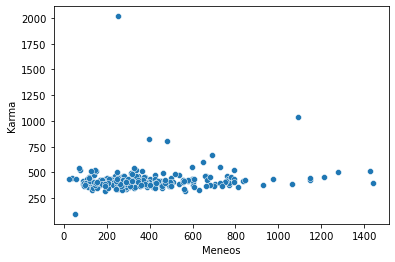

In [139]:
# No hi ha correlació entre el karma de l'usuari i els meneos 
sns.scatterplot(x=meneos,y=karma)
plt.show()

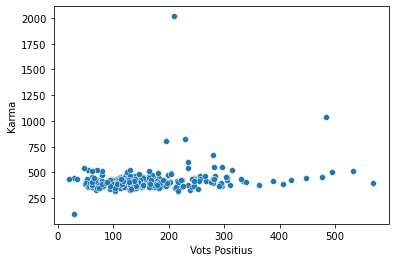

In [140]:
#  Tampoc hi ha correlació entre el karma de l'usuari i els vots positius
sns.scatterplot(x=vmas,y=karma)
plt.show()

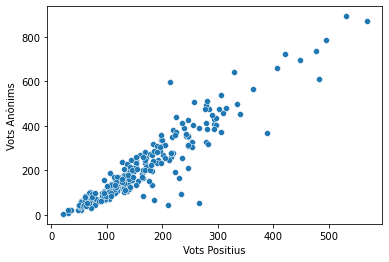

In [141]:
# Els vots anònims i els vots positius estan correlacionats:
sns.scatterplot(x=vmas,y=vanon)
plt.show()

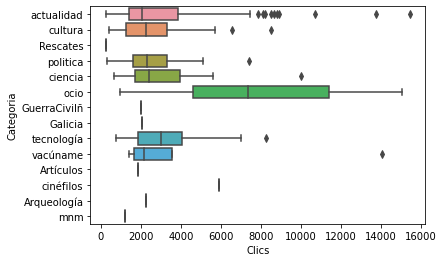

In [142]:
# Anàlisi per variables categòriques:
cat=menDF['Categoria']
usuari=menDF['Usuari']

# Quines categories reben més clics (segueixen l'enllaç per llegir la notícia)?
# Hi ha outliers?
sns.boxplot(x=clics,y=cat)
plt.show()

In [143]:
# Qui rep màxim de clics.
mx=max(clics)
menDF[menDF['Clics']>=mx]

,Titular,URL,Usuari,Entrada,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Categoria,Karma,Data Submissió
183,Lo que ha pasado esta tarde en Vallecas resum...,https://twitter.com/spanishrevorg/status/13798...,Álvaro91,Lo que ha pasado esta tarde en Vallecas resumi...,328,15441,323,234,94,64,actualidad,546,07-04-21 23:23


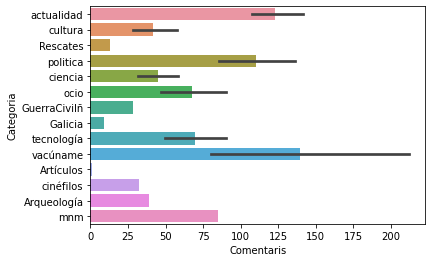

In [144]:
# Quin tema és el què rep més comentaris?
sns.barplot(x=comen,y=cat)
plt.show()

In [145]:
# Qui és  l'usuari que rep, en la mitjana, més comentaris?
import numpy as np
grouped = menDF.groupby('Usuari')
menDF[menDF['Comentaris']==max(grouped['Comentaris'].agg(np.mean))]

,Titular,URL,Usuari,Entrada,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Categoria,Karma,Data Submissió
118,Pablo Iglesias confirma que no se presentará ...,https://www.20minutos.es/noticia/4649588/0/pab...,libtalker,El actual secretario general de Unidas Podemos...,757,1459,583,389,368,5,actualidad,413,09-04-21 10:16


In [146]:
# Qui és l'usuari que rep, en la mitjana, més meneos?
menDF[menDF['Meneos']==max(grouped['Meneos'].agg(np.mean))]

,Titular,URL,Usuari,Entrada,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Categoria,Karma,Data Submissió
152,Un agente antidisturbios lanza una piedra a l...,https://twitter.com/Miquel_R/status/1380161401...,nitsuga.blisset,Video que muestra un agente antidisturbios de ...,1279,13724,282,495,784,11,actualidad,503,08-04-21 16:30


In [147]:
# Qui és l'usuari que rep, en la mitjana, més vots positius?
menDF[menDF['Vots Positius']==max(grouped['Vots Positius'].agg(np.mean))]

,Titular,URL,Usuari,Entrada,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Categoria,Karma,Data Submissió
152,Un agente antidisturbios lanza una piedra a l...,https://twitter.com/Miquel_R/status/1380161401...,nitsuga.blisset,Video que muestra un agente antidisturbios de ...,1279,13724,282,495,784,11,actualidad,503,08-04-21 16:30


In [148]:
# Qui és l'usuari amb més karma (una mena de carnet per punts de meneame:
# augmenta per resultats positius, et lleven per actitud negativa)?
menDF[menDF['Karma']==max(grouped['Karma'].agg(np.max))]

,Titular,URL,Usuari,Entrada,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Categoria,Karma,Data Submissió
16,Rusia prohíbe definitivamente el matrimonio h...,https://www.togayther.es/noticias/lgtbifobia/r...,baraja,NaN,253,617,172,210,43,5,politica,2017,11-04-21 11:50


In [149]:
# Qui és l'usuari que rep, en la mitjana, més vots negatius?
menDF[menDF['Vots Negatius']==max(grouped['Vots Negatius'].agg(np.max))]

,Titular,URL,Usuari,Entrada,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Categoria,Karma,Data Submissió
165,Santiago Abascal encuentra en Vallecas lo que...,https://www.eldiario.es/politica/santiago-abas...,Llaqui,Ayer un grupo de unos 300 cargos y militantes ...,752,4225,400,277,475,69,actualidad,411,08-04-21 07:43


In [150]:
# Quina és la notícia què rep més vots negatius?
mx=max(vmen)
menDF[menDF['Vots Negatius']>=mx]

,Titular,URL,Usuari,Entrada,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Categoria,Karma,Data Submissió
165,Santiago Abascal encuentra en Vallecas lo que...,https://www.eldiario.es/politica/santiago-abas...,Llaqui,Ayer un grupo de unos 300 cargos y militantes ...,752,4225,400,277,475,69,actualidad,411,08-04-21 07:43


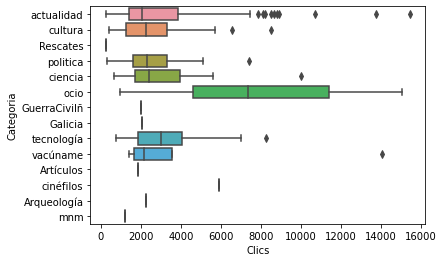

In [151]:
# En general, hi ha un fum d'outliers, potser perquè no és fàcil encaixar en una categoria l'aportació
# (o els outliers són la veritable notícia)
sns.boxplot(x=clics,y=cat)
plt.show()

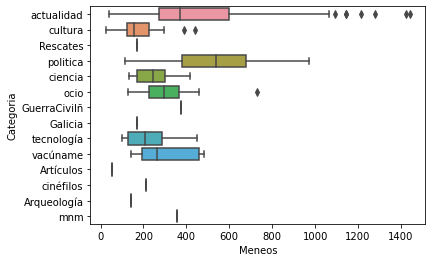

In [152]:
sns.boxplot(x=meneos,y=cat)
plt.show()

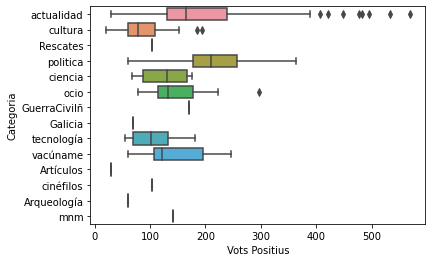

In [153]:
sns.boxplot(x=vmas,y=cat)
plt.show()

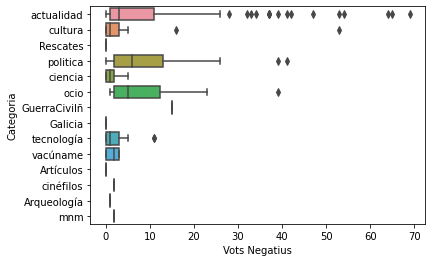

In [154]:
sns.boxplot(x=vmen,y=cat)
plt.show()

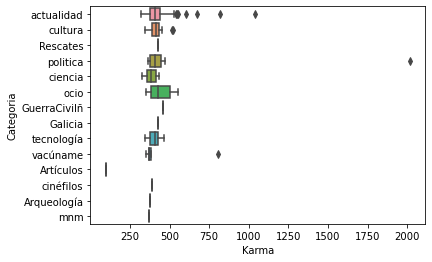

In [155]:
sns.boxplot(x=karma,y=cat)
plt.show()